# <font style: color='lime'> Depredador - Presa </font>

## <font style: color='green'> Enunciado </font>
La variable tiempo puede expresarse en “semanas”. Suponemos que la tasa de sobrevivencia de los zorros (sólo por
respirar) es del orden del 20% de su biomasa. De allí que el coeficiente de zorros a tasa de
sobrev. es de 0.2 y de –1 de tasa a zorros. El crecimiento de las liebres es del orden del 8%
por semana, en condiciones ideales, es decir sin límite de alimentación provista por el campo.
Entonces la relación liebres a crecimiento neto es 0.08. Sin embargo este crecimiento está
limitado a la capacidad actual del terreno, de allí que debemos relacionarla con esta variable y
con la capacidad máxima del terreno. Las población de las liebres también están regulada por
la población de los zorros. Esta variable reguladora entre los zorros y las liebres la llamamos
caza. A fin de evaluar los coeficientes de la caza, debemos estimar que los zorros puedan
subsistir y compensar su gasto en respiración (energía interna). En una población normal de
500 liebres y 10 zorros, los zorros apenas pueden sobrevivir ; la relación de caza entre zorros
y liebres es el producto 500 libres * 10 zorros = 5000 encuentros. Las pérdidas de zorros es
0.2*10 = 2; de allí obtenemos que por cada liebre cazada sobreviven 2/5000 =0.0004 zorros.
Las pérdidas en la población de liebres por cada caza es 10 z. /5000 enc. = -0.002.

In [1]:
# Parametros Iniciales
semanas = 500
inc_semanas = 1
liebres = 2000
zorros = 10
cap_ter = 1500
tasa_liebres = 0.002 # Tasa de perdida de liebres por encuentro
tasa_zorros = 0.0004 # Tasa de crecimiento de zorros por encuentro
nata_liebres = 0.08
mort_zorros = 0.2

In [2]:
import pandas as pd

data = pd.DataFrame([])
data = pd.concat([data, pd.DataFrame({'Semana': 0, 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)
data[['Semana','Liebres','Zorros']]

,Semana,Liebres,Zorros
0,0,2000,10


## Simulación

In [3]:
for semana in range(1, semanas+1):
    cap_act = cap_ter - liebres
    inc_liebres = (1/cap_ter)*cap_act*nata_liebres*liebres
    sob_zorros = mort_zorros*zorros
    caza = zorros*liebres
    liebres = liebres+inc_semanas*(inc_liebres-tasa_liebres*caza)
    zorros = zorros+inc_semanas*(tasa_zorros*caza-sob_zorros)
    data = pd.concat([data, pd.DataFrame({'Semana': int(semana), 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)

data[['Semana','Liebres','Zorros']]

,Semana,Liebres,Zorros
0,0,2000,10
1,1,1906,16
2,2,1804,25
3,3,1684,38
4,4,1539,56
...,...,...,...
496,496,494,25
497,497,496,25
498,498,497,25
499,499,499,25


## Grafico de población

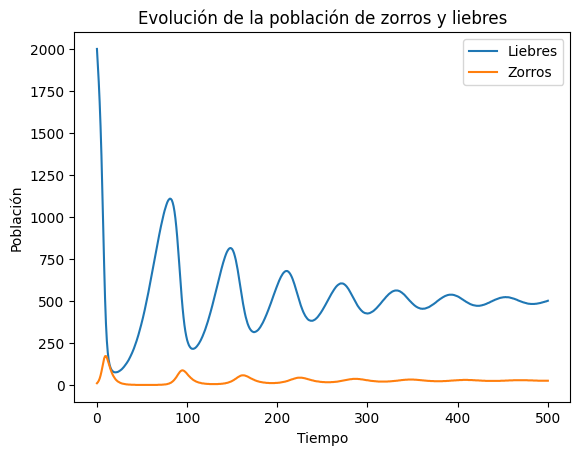

In [4]:
import matplotlib.pyplot as plt

plt.plot(data['Liebres'].tolist(), label="Liebres")
plt.plot(data['Zorros'].tolist(), label="Zorros")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Evolución de la población de zorros y liebres")
plt.legend()
plt.show()

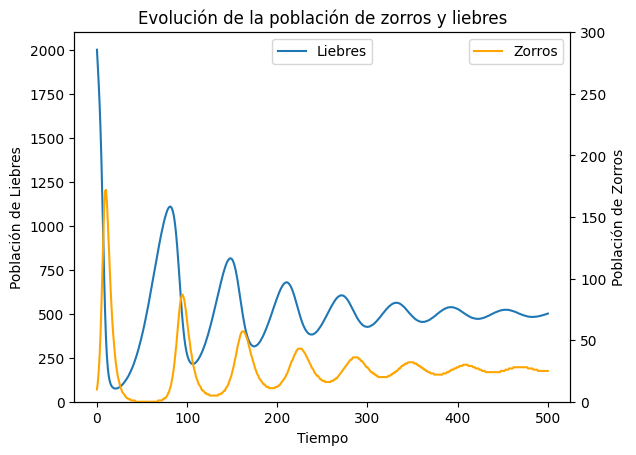

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylim(0,2100)
ax2.set_ylim(0,300)
ax1.plot(data['Liebres'].tolist(), label="Liebres")
ax2.plot(data['Zorros'].tolist(), label="Zorros", color='orange')
ax1.set_ylabel("Población de Liebres")
ax2.set_ylabel("Población de Zorros")
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax1.set_xlabel("Tiempo")
plt.title("Evolución de la población de zorros y liebres")
plt.show()

## Diagrama de fase

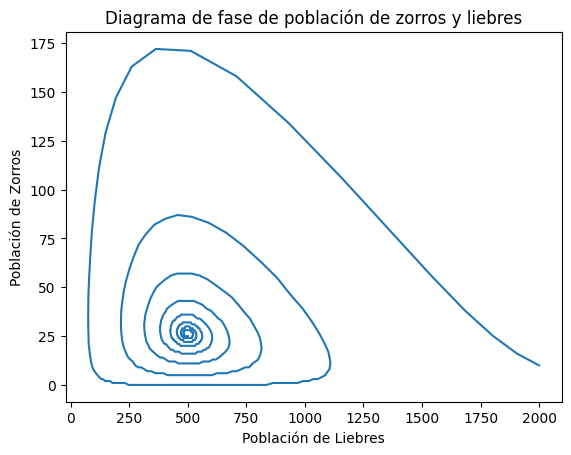

In [6]:
plt.plot(data['Liebres'].tolist(), data['Zorros'].tolist())
plt.xlabel("Población de Liebres")
plt.ylabel("Población de Zorros")
plt.title("Diagrama de fase de población de zorros y liebres")
plt.show()